#### Grism analysis
- 28 March 2022 RLM

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
from scipy.signal import medfilt, medfilt2d
from grism_analysis_lib import grism_tools
import os,sys

In [14]:
# set path to grism file
star_name = 'Neptune'
base_directory = '/Users/rlm/Dropbox/Gemini/Grism/Grism-Mar2022/'
fts_file = '%sxwg34109-Neptune.fts' % base_directory

# Set path to calibration file
cal_directory = '/Users/rlm/Dropbox/Gemini/Grism/Grism-Mar2022/'
cal_file = '%s/grism_cal_6_2022_04_03.csv' % cal_directory


# Check if raw grism, calibration files exist
if not os.path.exists(fts_file):
    print('FITS file %s not found, check name/path' % fts_file)

im, hdr = getdata(fts_file, 0, header=True)
grism_filter = hdr['FILTER'][0]
star = hdr['OBJECT']
print('Analyzing image  %s\nGrism filter %s' % (fts_file,grism_filter))

if os.path.exists(cal_file):
    print('Found calibration file %s' % os.path.basename(cal_file))
else:
    print('Calibration file %s not found' % cal_file)
    
# Jacoby Reference file [if it exists, if not, set to '']
ref_file = '/Users/rlm/Dropbox/Gemini/Grism/GRISM_calibration/Jacoby_spectra/%s-Jacoby-spec.csv' % star_name
if  os.path.exists(ref_file):
    print('Found Jacoby reference spectrum: %s' % os.path.basename(ref_file))
else:  
    print('N.B. Jacoby reference spectrum %s does not exist' % ref_file)
    ref_file = ''

Analyzing image  /Users/rlm/Dropbox/Gemini/Grism/Grism-Mar2022/xwg34109-Neptune.fts
Grism filter 6
Found calibration file grism_cal_6_2022_04_03.csv
N.B. Jacoby reference spectrum /Users/rlm/Dropbox/Gemini/Grism/GRISM_calibration/Jacoby_spectra/Neptune-Jacoby-spec.csv does not exist


In [15]:
# Instantiate class

G = grism_tools(fts_file,cal_file,ref_file)
title, star, utdate, myfilter,telescope, instrument = G.header_params()
print(star,utdate,myfilter,telescope,instrument)
print(title)

Neptune 2022-12-07 02:20:00 6 Iowa Robotic Telescope SBIG Aluma AC4040
Neptune
Iowa Robotic Telescope 2022-12-07 02:20:00 grism: 6


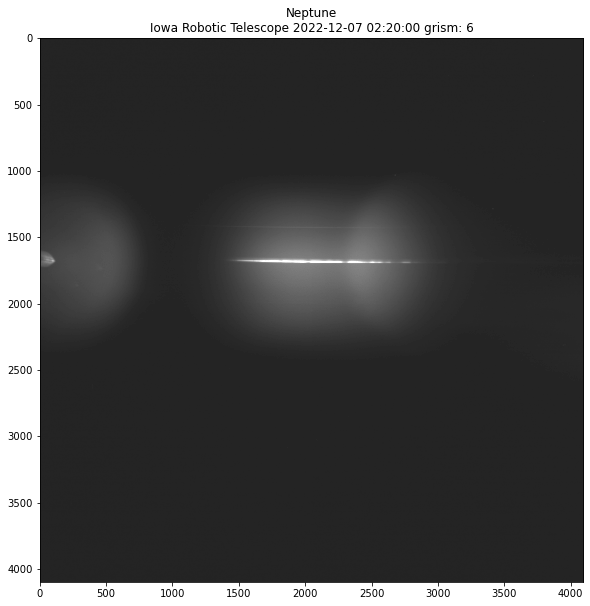

In [16]:
fig = G.plot_image(figsize =(10,10),cmap='gray')

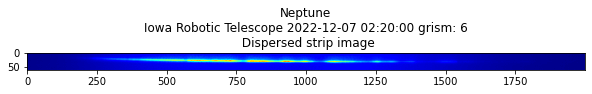

In [17]:
fig = G.plot_strip(cmap='jet')

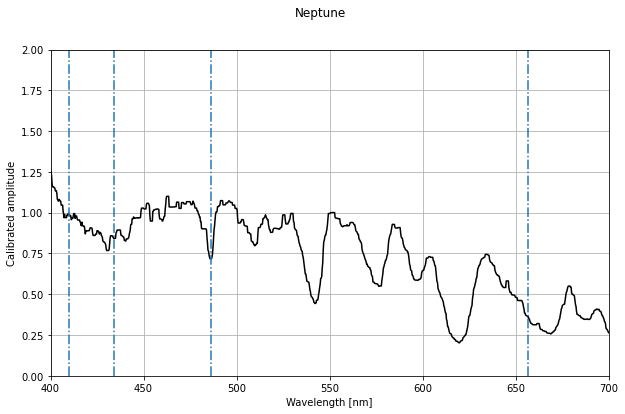

In [18]:
fig = G.plot_spectrum(calibrated = True, plot_balmer=True,title=star_name, xlims =[400,700], ylims =[0.0,2], medavg = 9)

[ 3.10300299e-01  4.86066603e+02  1.45703348e+00 -7.09876170e-04
  3.74251509e-01]


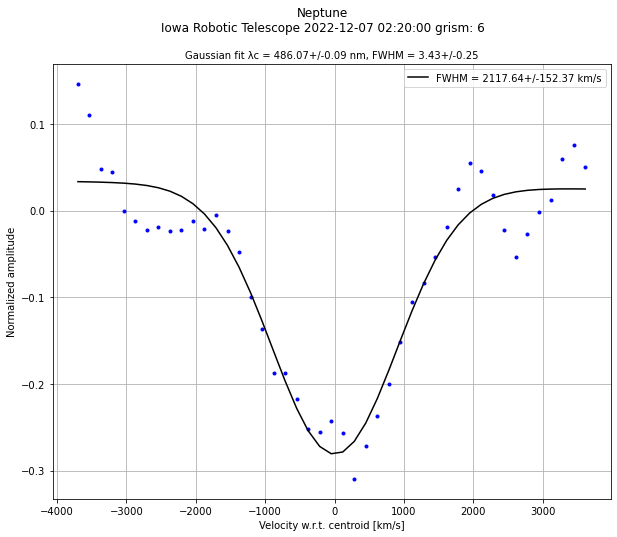

In [21]:
fig,popt = G.fit_gaussian(480,492, use_velocity=True, emission=False)
print(popt)

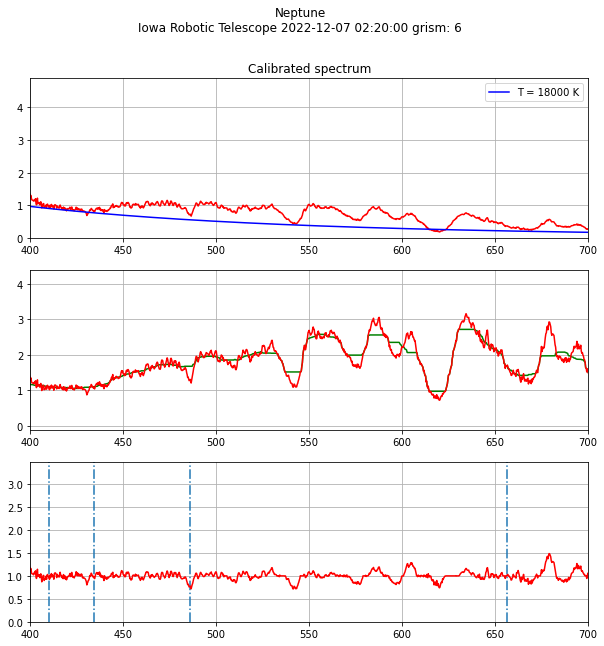

In [22]:
T = 18000
fig = G.plot_rectified_spectrum(T,wavemin=400,wavemax=700)
plt.show(fig)

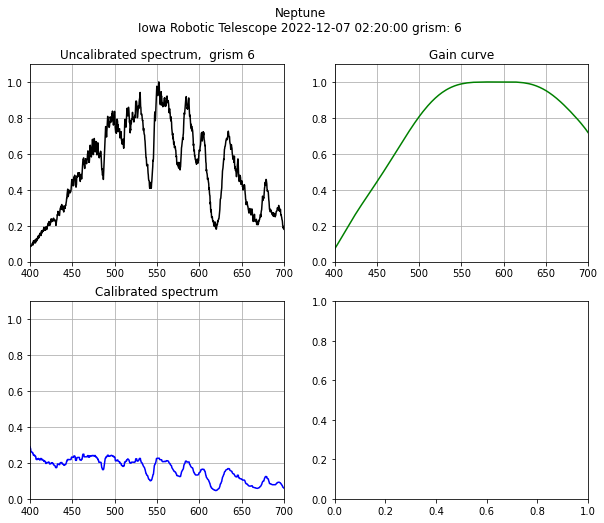

In [23]:
fig = G.plot_2x2(ref_file=ref_file, medavg=9, xlims =[400,700])
plt.show(fig)